In [52]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization

In [40]:
df = pd.read_csv('data/csv/Features.csv')
# Convert the 'Location' column to categorical labels
df['Location'] = pd.Categorical(df['Location'])
df['Location'] = df['Location'].cat.codes

In [41]:
numeric_features = ['Mean', 'Stdev', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [42]:
def string_to_array(string):
    list_of_lists = eval(string)
    array = np.array(list_of_lists, dtype=int).flatten()
    return array

def other(string):
    elements = string.strip('[]').split(',')
    array = np.array(elements, dtype=int).flatten()
    return array

def rescale(array):
    array = (array-np.min(array))/(np.max(array)-np.min(array))
    return array

df['Intensity'] = df['Intensity'].apply(other).apply(rescale)
df['RGB'] = df['RGB'].apply(string_to_array).apply(rescale)

In [56]:
X = df.drop(columns=['Location', 'East', 'North']).to_numpy().flatten()
y = df['Location'].to_numpy().flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
shape = X_train[0].shape

ValueError: Found input variables with inconsistent numbers of samples: [6352, 794]

In [53]:
model = Sequential()
model.add(Flatten(input_shape=shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

/Users/edwinvincendeau/Desktop/2eme semestre/Advanced/ADA/Swisscities/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 371ms/step - accuracy: 0.1192 - loss: 34.3664 - val_accuracy: 0.1210 - val_loss: 2.3135
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.1020 - loss: 2.3183 - val_accuracy: 0.1338 - val_loss: 2.2973
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 451ms/step - accuracy: 0.1644 - loss: 2.2987 - val_accuracy: 0.1847 - val_loss: 2.2894
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 400ms/step - accuracy: 0.1607 - loss: 2.2897 - val_accuracy: 0.1783 - val_loss: 2.2767
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 350ms/step - accuracy: 0.1382 - loss: 2.2822 - val_accuracy: 0.1783 - val_loss: 2.2650
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.1714 - loss: 2.2666 - val_accuracy: 0.1783 - val_loss: 2.2532
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.1547 - loss: 2.2576 - val_accuracy: 0.1783 - val_loss: 2.2428
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 409ms/step - accuracy: 0.1330 - loss: 2.2604 - val_accuracy: 

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

5/5 - 0s - 77ms/step - accuracy: 0.1783 - loss: 2.2174

Test accuracy: 0.17834395170211792


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


<Figure size 800x600 with 0 Axes>

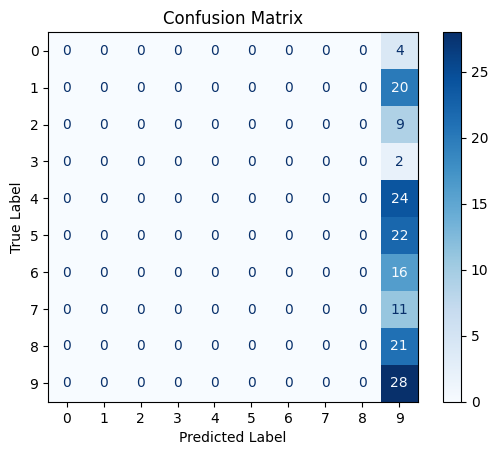

Location
5    130
9    123
4    107
8    101
1     82
6     68
7     60
0     42
2     40
3     31
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm, display_labels=np.unique(df['Location'])).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(df['Location'].value_counts())